In [1]:
# Autor = BESP
# Name = MyUniverse
# Date = 20 10 16
# Version = V001

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Libraries
import numpy as np
from matplotlib import pyplot as plt
import random
import math 
from scipy.stats import bernoulli
import copy
from mpl_toolkits.axes_grid1 import make_axes_locatable 
import imageio

In [4]:
# USSEFUL PROCEDURES FOR DICTIONARIES

### addDL (add values  to Dictionary of Lists)
# Pocedure: anex a new value to the list asociated to a key
def addDL(DICCIONARIO, KEY, VALUE):
  TEMPk = DICCIONARIO[KEY][0:len(DICCIONARIO[KEY])]  # This is for extract the values and discard the pointer
  TEMPk.append(VALUE) 
  DICCIONARIO[KEY] = TEMPk   # To actualize


In [5]:
# USEFUL EXTRACTIONS

### extractPOP (Count the number of elements of any key in a dictionary)
# Procedure: Returns a dictionary of lists length 1 with the cout of the elements
# *Exists a procedure wich returns a dictionary of values in TRASH
def extractPOP(LISTbac):
  POPdic = {}
  for i in LISTbac:
    if i.CTYPE in POPdic:
      POPdic[i.CTYPE] = [POPdic[i.CTYPE][0] + 1]
    else:
      POPdic[i.CTYPE] = [1]
  
  return POPdic


In [7]:
# Defining the first entity of my universe!

class BACTERIA:
      ID = ""
      CTYPE = ""
      ATP = 0  
      GEN = 0  # The number of divissions
      GR = 0  # Growth rate ant time t
      #HGTrecipCost = 0

      PLAScount = {"TYPE1": 0,}  # Number of plasmids of each type in the bacteria
      #PLASrepre = []   # A representative of the plasmids'type



      
      ### CONSTRUCTOR
      def __init__(self, ID, CTYPE, PLAScount, PARAMETERS={"c", "Vmax", "Km", "MAXg", "MAXab", "MAXexp", "MINatp"}):
        self.CTYPE = CTYPE  # It should be here or outside
        self.ID = ID
        #self.HGTrecipCost = HGTrecipCost
        self.PARAMETERS = PARAMETERS

        self.PLAScount = PLAScount
        #PLASrepre = UNIVERSEplas


      
      ### DESCRIPTION
      def description(self):
        print(f"{self.CTYPE} ; {self.ID} ; {self.PARAMETERS} -> ATP = {self.ATP}") 

  
      
      ### GROW : Takes Amount of resources (R)
      def grow(self, R_LOCgrow): 
        R = R_LOCgrow[0]
        c = self.PARAMETERS["c"]   # Rate of metabolism
        Vmax = self.PARAMETERS["Vmax"]   # Max rate of uptake from the enviroment
        Km = self.PARAMETERS["Km"]   # Half-saturation constant


        uR = Vmax*R / (Km + R)   # Uptake function   

        gR = c*uR  # Growth function
        self.GR = round(gR,5)   # We save this to use it in the enzyme production

        self.ATP = self.ATP+gR   # ATP actualization
        R_LOCgrow[0] = R_LOCgrow[0] - uR   # Resourses actualization after eat ################ It could be better to actualize this value outside the definition ######################## 
        

      ### HARM EVENTS OF REDUCTION OF FITNESS 
      def HARM(self, AMOUNTab):
        if AMOUNTab >= self.PARAMETERS["MAXab"]:
          self.STATE = 0
          return "DIE"       


      
      ### DIVIDE
      def divide(self, IDd):   ################ Is it better to append the new born here or outside? #################
        # Actualization of the mother cell
        self.GEN = self.GEN + 1 # Number of divisions
        self.ATP = self.ATP/2  # Price of the division

        
        # Heretability
        PARAMETERSd = self.PARAMETERS
        BACdaugh = BACTERIA(IDd, self.CTYPE, self.PLAScount, PARAMETERSd)
        BACdaugh.ATP = self.ATP

        # Plasmids
        for key in self.PLAScount:  # Pass the plasmids
          #UNIVERSEplas[key].inherit(self, BACdaugh)
          qqqqq=0
  
        return BACdaugh
      
      
      # Function of actualization
      def actualizar(self, BAClist, R_LOCactualizar):
        if self.ATP < 0 or math.isnan(self.ATP):
          self.STATE = 0
          return "DIE"
        MAXg = self.PARAMETERS["MAXg"]
        for key in self.PARAMETERS["MAXab"]:
          if R_LOCactualizar[key][0] >= self.PARAMETERS["MAXab"][key]:
            self.STATE = 0
            return "DIE"

        
        if self.ATP <= MAXg:  # Is keep growing feasible?
          self.grow(R_LOCactualizar["R"])
        
        else:  # Or is time to divide?
          IDd = self.ID + "_" + str(len(BAClist)+1)   # Id of the new bacteria
          BAClist.append(self.divide(IDd))


      





In [ ]:
"""PRUEBA = BACTERIA("PRUEBA", "TYPEA", PARAMETERS={"c": .06, "Vmax": .05, "Km": .2, "MAXg": .0000005})
PRUEBA.description()
PRUEBAS = [PRUEBA]
PRUEBA.actualizar(PRUEBAS, [100])
PRUEBA.actualizar(PRUEBAS, [100])o
PRUEBAS[0].description()
PRUEBAS[1].description()kk
PRUEBAS"""

'PRUEBA = BACTERIA("PRUEBA", "TYPEA", PARAMETERS={"c": .06, "Vmax": .05, "Km": .2, "MAXg": .0000005})\nPRUEBA.description()\nPRUEBAS = [PRUEBA]\nPRUEBA.actualizar(PRUEBAS, [100])\nPRUEBA.actualizar(PRUEBAS, [100])o\nPRUEBAS[0].description()\nPRUEBAS[1].description()kk\nPRUEBAS'

In [9]:
# Defining the space cells
class LOCATION:
      # MAXIMA
      MAXbac = {}
      MAXmet = {}
      MAXplas = {}
      # COORDENATES
      NUM = ""
      LAYER = ""
      # PLOT COORDENATES
      X = ""
      Y = ""
      # RESOURCES
      MET = {}   # Metabolites in LOCATION. DICTIONARY OF LISTS LENGTH 1
      # POPULATION IN THAT SPOT
      POPXYlist = []   # Bacterias contained in LOCATION. LIST 


      # AMOUNTS OVER THE TIME
      PLASt = {}   # Plas numbers over the time. DICTIONARY OF NUMBERS LENGTH NUMBER OF TYPE OF PLASMIDS
      POPt = {}   # Pop numbers over the time. DICTIONARY OF LISTS LENGTH t + 1
      METt = {}   # Metabolites over the time. DICTIONARY OF LISTS LENGTH t + 1
      


  
      ### CONSTRUCTOR
      def __init__(self, LAYER, NUM):
        self.LAYER = LAYER
        self.NUM = NUM
        
      
      ### ASIGNATION OF COORDENATES IN PLOT
      def asignXY(self, X, Y):
        self.X = X 
        self.Y = Y


      ### INOCULATE LOCATION WITH POPULATION AND METABOLITES
      def inoculate(self, TYPES_NUM, METype, PLASMIDS, PARAMETERS):

        BAClist = []   # Repertoire of new bacterias, it can be empty
        for key in TYPES_NUM:
          PLASMIDSkey = PLASMIDS[key]
          for i in range(TYPES_NUM[key][0]):
            ID = key+str(i)
            BAClist.append(BACTERIA(ID, key, PLASMIDSkey, PARAMETERS[key]))
        
        self.POPXYlist = BAClist
        self.MET = {}
        for key in METype:
          self.MET[key] = [METype[key][0]]  # This is a copy
        
        self.PLASt = dict.fromkeys(PLASMIDS)
        for key in PLASMIDS:
          self.PLASt[key] = dict.fromkeys(PLASMIDS[key])
          for i in PLASMIDS[key]:
            self.PLASt[key][i] = [PLASMIDS[key][i]*TYPES_NUM[key][0]]


        self.POPt = TYPES_NUM 
        #for key in self.POPt:
         # addDL(self.POPt, key, self.POPt[key][-1])
          #self.POPt[key].insert(0, self.POPt[key][-1])
        #self.METt = METype.copy()
        self.METt = {}
        for key in METype:
          self.METt[key] = [METype[key][0]]  # This is a copy
          #self.METb[key] = [METype[key][0], METype[key][0]]
          #addDL(self.METt, key, self.METt[key][-1])

        for key in self.METt:
          self.MAXmet[key] = self.METt[key][0]
        
        for key in self.POPt:
          self.MAXbac[key] = self.POPt[key][0]
        
        NAMESplas = list(PLASMIDS[list(PLASMIDS.keys())[0]])
        for i in NAMESplas:
          self.MAXplas[i] = 0
        for key in PLASMIDS:
          for key2 in PLASMIDS[key]:
            self.MAXplas[key2]+=PLASMIDS[key][key2]
            


      
      ### DEFINITION OF THE FUNCTION OF EXTRACTION OF THE POPULATION NUMBERS BY TIPE
      def extractPOPnum(self):
        POPdic = {}
        for i in self.POPXYlist:
          if i.CTYPE in POPdic:
            POPdic[i.CTYPE] = POPdic[i.CTYPE] + 1
          else:
            POPdic[i.CTYPE] = 1
        return POPdic


      ### DESCRIPTION
      def description(self):
        print(f"{self.LAYER, self.NUM} ; {self.MET} ; ", extractPOP(self.POPXYlist))
      
      
      ### FUNCTION OF ACTUALIZATION OF THE LOCATION IN A TIME
      def iterate(self):
          for key in self.PLASt:
            for i in self.PLASt[key]: 
              self.PLASt[key][i].append(self.PLASt[key][i][-1])
          FALLEN = []
          
          
          LEN0 = len(self.POPXYlist)   # Ensures that the new borns added to the list are not conssiderated in the update
          random.shuffle(self.POPXYlist)   # Ensures equality of resourse avaliability

          for i in range(LEN0):
            BACi = self.POPXYlist[i]
            DIEorLIVE = BACi.actualizar(self.POPXYlist, self.MET)   # Actualization
            if DIEorLIVE is "DIE":
              FALLEN.append(i)
              break
            for key in BACi.PLAScount:
              UNIVERSEplas[key].secretion(BACi, self)
              #UNIVERSEplas[key].replication(BACi, self)
              UNIVERSEplas[key].cost(BACi)
          
          LEN1 = len(self.POPXYlist)
          for i in range(LEN0, LEN1):  # For the new added, therefore the newborns
            NEW = self.POPXYlist[i]
            self.POPt[NEW.CTYPE][-1] = self.POPt[NEW.CTYPE][-1] + 1  # If there is a new born, then the population numer growth

          for i in FALLEN:
            for key in self.PLASt[self.POPXYlist[i].CTYPE]:
              self.PLASt[self.POPXYlist[i].CTYPE][key][-1] = self.PLASt[self.POPXYlist[i].CTYPE][key][-1] - self.POPXYlist[i].PLAScount[key]
            self.POPt[self.POPXYlist[i].CTYPE][-1]-=1
            del self.POPXYlist[i]

          for key in self.MET:  # There is an actualization of the resources, do it here allows call the function without previous requiriments
            addDL(self.METt, key, self.MET[key][0])


In [10]:
# Defining the plasmid
class PLASMID:
      #ID = ""
      TYPE = ""
      ENZIME = ""
      
      # PARAMETERS (7)
      EXISTENCEcost = 0  # How much ATP cost the production of the proteins codded? + how much cost the secretion system?
      HGTcost = 0  # How much ATP cost the HGT procedure?
      HGTcostRecipe = 0
      #VSprod = {"NAME":0,}   # Rate of enzyme production
      VSeffect = {"NAME":0,}  # Rate of degradation of the enzyme
      REPLICATIONcost = 0  # How much ATP cost the inherit the plasmid?
      REPrate = 0   # In 10 time cycles, how many times the plasmid can be replicated?
      MAXnum = 0   #  Max numbers of plasmids
      #LOSSofFUNCTION = 0  # How feassible is to adquire a mutation to loss the advantaje?
      


      ### CONSTRUCTOR
      def __init__(self, TYPE, ENZIME, PARAMETERS={"EXISTENCEcost", "HGTcost", "HGTcostRecipe", "VSeffect", "REPLICATIONcost", "REPrate", "MAXnum"}):
        # PARAMETERS ()
        self.TYPE = TYPE
        self.ENZIME = ENZIME
        self.EXISTENCEcost = PARAMETERS["EXISTENCEcost"]
        self.HGTcost = PARAMETERS["HGTcost"]
        self.HGTcostRecipe = PARAMETERS["HGTcostRecipe"]
        self.VSeffect = PARAMETERS["VSeffect"]
        self.REPLICATIONcost = PARAMETERS["REPLICATIONcost"]
        self.REPrate = PARAMETERS["REPrate"]
        self.MAXnum = PARAMETERS["MAXnum"]



      ### DUPLICATION OF THE PLASMIDS. Every t
      def replication(self, BACTERIA, LOC):
        print("ENTRA")
        if self.MAXnum <= BACTERIA.PLAScount[self.TYPE]: # Then the bacteria can not adquire more plasmids
          #print("ENTRA")
          return

        NUMBER = int(self.REPrate * BACTERIA.PLAScount[self.TYPE])    # This has to be less than BACTERIA.ATP/PLASMID.REPLICATIONcost
        #print(NUMBER, self.REPrate, BACTERIA.PLAScount[self.TYPE])
        if NUMBER*self.REPLICATIONcost > BACTERIA.ATP/2:
          NUMBER = int(BACTERIA.ATP/self.REPLICATIONcost)
  

        NUMBERt2 = NUMBER + BACTERIA.PLAScount[self.TYPE]  # Does number exedes the MAXnum?
        if NUMBERt2 >= self.MAXnum:
          NUMBER = NUMBERt2 - NUMBER
        BACTERIA.ATP = round(BACTERIA.ATP - self.REPLICATIONcost * NUMBER, 5)

        BACTERIA.PLAScount[self.TYPE]+=NUMBER
        LOC.PLASt[BACTERIA.CTYPE][self.TYPE][-1] = LOC.PLASt[BACTERIA.CTYPE][self.TYPE][-1] + NUMBER
        




      def replicationOne(self, BACTERIA, LOC):
        if BACTERIA.ATP < self.REPLICATIONcost:  # Then the bacteria can not fund the replication
          return
        if MAXnum != BACTERIA.PLAScount[self.type]:  # If is False, then the bacteria can not adquire more plasmids of that type
          REP = list(bernoulli.rvs(size=1,p=self.REProb))[0]   # It's like a replication rate
          if REP == 1:
            BACTERIA.ATP = BACTERIA.ATP - self.REPLICATIONcost   # There is a cost for the replication
            BACTERIA.PLAScount[self.type]+=1   # Counter actualization
            LOC.PLASt[-1] = LOC.PLASt[-1] + NUMBER
          else:
            return

      ### SECRETION OF THE ENZYMES CODDED BY DE PLASMID. Every t
      def secretion(self, BACTERIA, LOCATION):
        AMOUNTenzime = round(BACTERIA.GR * BACTERIA.PARAMETERS["MAXexp"] * BACTERIA.PLAScount[self.TYPE], 5)  # Depends on the bacteria growth the rate of enzyme production
        #print("####################",AMOUNTenzime, BACTERIA.GR, BACTERIA.PARAMETERS["MAXexp"], BACTERIA.PLAScount[self.TYPE])
        AMOUNTenzime = AMOUNTenzime + LOCATION.MET[self.ENZIME][0]
        
        
        for key in self.VSeffect:
          ACTIVEnzime = round(AMOUNTenzime * self.VSeffect[key], 5)
          AB = LOCATION.MET[key][0]

          LOCATION.MET[key][0]-=ACTIVEnzime
          LOCATION.MET[self.ENZIME][0] = LOCATION.MET[self.ENZIME][0] + AMOUNTenzime - ACTIVEnzime

          if AB < ACTIVEnzime:
            LOCATION.MET[self.ENZIME][0] = AMOUNTenzime - AB
            LOCATION.MET[key][0] = 0
        #print(AMOUNTenzime, BACTERIA.GR, BACTERIA.PARAMETERS["MAXexp"], BACTERIA.PLAScount[self.TYPE])
                   
     


      ### COST OF THE EXISTENCE (REPRESSION, PROTEIN PRODUCTION, a.a. DEPLETION, ETC). Every t
      def cost(self, BACTERIA):
        BACTERIA.ATP = round(BACTERIA.ATP - self.EXISTENCEcost * BACTERIA.PLAScount[self.TYPE], 5)

      
      ### DIVISION RANDOM: INHERIT OF THE PLASMIDS INTO THE MOTHER AND THE DAUGHTHER. ITS NOT EQUAL. Only in divission
      def inheritRnd(self, BACTERIA1, BACTERIA2):  # BACTERIA1: Mother; BACTERIA2: daugther
        if BACTERIA.ATP < 0:
          return
        if BACTERIA1.PLAScount[self.TYPE] == 0:  # If you have not any plasmid, you can not inherit anyone
          return
        
        
        NUM = BACTERIA1.PLAScount[self.TYPE]   # Divide the plasmid population in that bacteria into two
        NUM1 = random.randrange(0, NUM+1)
        NUM2 = NUM-NUM1
        BACTERIA1.PLAScount[self.TYPE] = NUM1  # Actualization of the counter
        BACTERIA2.PLAScount[self.TYPE] = NUM2
        #BACTERIA2.PLASrepre.append(UNIVERSplas["type"])  # Append new info into the plasmids population
      
      
      ### DIVISION EXACTLY HALF: INHERIT OF THE PLASMIDS INTO THE MOTHER AND THE FAUGHTHER. Only in divission
      def inherit(self, BACTERIA1, BACTERIA2):   # BACTERIA1: Mother; BACTERIA2: daugther
        print("ENTRAAAAAA")
        if BACTERIA.ATP < 0:
          return
        if BACTERIA1.PLAScount[self.TYPE] == 0:  # If you have not any plasmid, you can not inherit anyone
          return
        else:

          NUM = BACTERIA1.PLAScount[self.TYPE]   # Divide the plasmid population in that bacteria into two
          #print(NUM)
          NUM1 = round(NUM/2.0)
          NUM2 = NUM - NUM1

          BACTERIA1.PLAScount[self.TYPE] = NUM1
          BACTERIA2.PLAScount[self.TYPE] = NUM2
      
      
      ### HGT FUNCTION. Only at certain t's
      def RomanticNigth(self, BACTERIA1, BACTERIA2, LOC):   # BACTERIA1: Donnor; BACTERIA2: Receptor
        if BACTERIA.ATP < 0:
          return
        if BACTERIA1.ATP < self.HGTcost or BACTERIA2.ATP < BACTERIA2.HGTrecipCost:  # Then the bacterias can not found the HGT
          return
        if self.TYPE in BACTERIA2.PLAScount and BACTERIA2.PLAScount[self.type] != 0:   # Then the receptor already has at least a plasmid of TYPE
          return
        if BACTERIA1.PLAScount[self.TYPE] < 2:
          return
        else:
          BACTERIA1.ATP = BACTERIA1.ATP - self.HGTcost   # Cost of the HGT
          BACTERIA2.ATP = BACTERIA2.ATP - self.HGTcostRecipe

          BACTERIA2.PLAScount[self.TYPE] = 1
          
          LOC.PLASt[BACTERIA1.CTYPE][self.TYPE][-1]-=1
          LOC.PLASt[BACTERIA2.CTYPE][self.TYPE][-1]+=1
        

          #BACTERIA2.PLASrepre.append(UNIVERSEplas["type"])   # The bacteria actualizes his plasmids population



In [ ]:
"""PRUEBAS[0].description()
L = LOCATION(1, 1)
L.init({"TYPEA": [1], "TYPEB": [1]}, {"R": [0]}, {"TYPEA": {"c": .06, "Vmax": .05, "Km": .2, "MAXg": .0000005}, "TYPEB": {"c": .06, "Vmax": .05, "Km": .2, "MAXg": .0000005}})
L.description()"""

'PRUEBAS[0].description()\nL = LOCATION(1, 1)\nL.init({"TYPEA": [1], "TYPEB": [1]}, {"R": [0]}, {"TYPEA": {"c": .06, "Vmax": .05, "Km": .2, "MAXg": .0000005}, "TYPEB": {"c": .06, "Vmax": .05, "Km": .2, "MAXg": .0000005}})\nL.description()'

In [11]:
# R diffusion
def diffMB(LOCS, LOC, Cbac, C={"R":"", "ANTIBIOTIC":"", "OTHER":""}):
    NEIGH = neigh(LOCS, LOC.LAYER, LOC.NUM)
    random.shuffle(NEIGH)  # Avoid bias by neighbor order
    
    for i in NEIGH:
      for key in LOC.MET: 
        HERE = round(LOC.MET[key][0], 5)
        
        THERE = round(i.MET[key][0], 5)
        CHANGE = round(C[key]*(THERE - HERE), 5)
        
        i.MET[key][0] = THERE - CHANGE
        LOC.MET[key][0] = HERE + CHANGE
        i.METt[key][-1] = i.MET[key][0] 
        LOC.METt[key][-1] = LOC.MET[key][0]


      if len(LOC.POPXYlist) == 0:
        continue
      MOVEdic = {}

      for key in Cbac:
        MOVE = int(Cbac[key] * LOC.POPt[key][-1])
        MOVEdic[key] = MOVE
      
      DIC0s = dict.fromkeys(MOVEdic.keys(), 0)
      while MOVEdic != DIC0s:
        INDEX = random.randint(0, len(LOC.POPXYlist)-1)
        BACTERIA = LOC.POPXYlist[INDEX]
        if MOVEdic[BACTERIA.CTYPE] > 0:
          #print("A", BACTERIA.PLAScount, LOC.PLASt, i.PLASt)
          BACTERIA = LOC.POPXYlist.pop(INDEX)          
          i.POPXYlist.append(BACTERIA)
          
          MOVEdic[BACTERIA.CTYPE]-=1

          LOC.POPt[BACTERIA.CTYPE][-1]-=1
          i.POPt[BACTERIA.CTYPE][-1]+=1
          
          for key in LOC.PLASt[BACTERIA.CTYPE]:
            LOC.PLASt[BACTERIA.CTYPE][key][-1]-=BACTERIA.PLAScount[key]
            i.PLASt[BACTERIA.CTYPE][key][-1]+=BACTERIA.PLAScount[key]
          #print(BACTERIA.PLAScount, LOC.PLASt, i.PLASt)


In [12]:
# ITERATIONS OVER THE TIME AND LOCS
def worldItera(T, LOCS, CB, CMET={"R", "ANTIBIOTIC", "OTHERS"}):
  for i in range(T):
    print("---------------", i+1, "---------------")

    for j in LOCS:

      for key in j.POPt:   # Appends a new data repositoire
        addDL(j.POPt, key, j.POPt[key][-1])
     
      j.iterate()

      
    for j in LOCS:
      # DIFFUSION
      diffMB(LOCS, j, CB, CMET)
      for key in j.MAXbac:
        if j.MAXbac[key] < j.POPt[key][-1]:
          j.MAXbac[key] = j.POPt[key][-1]
      for key in j.MAXmet:
        if j.MAXmet[key] < j.METt[key][-1]:
          j.MAXmet[key] = j.METt[key][-1]
      TEMPplas = dict.fromkeys(j.MAXplas, 0)
      for key in j.PLASt:
        for key2 in j.PLASt[key]:
          TEMPplas[key2]+=j.PLASt[key][key2][-1]

      for key in TEMPplas:
        if j.MAXplas[key] < TEMPplas[key]:
          j.MAXplas[key] = TEMPplas[key]
        




In [13]:
# DEFINITION OF THE WORLD
def world(NUMlayers, POPUtypes0, PLAScount, MET0={"R":[], "ANTIBIOTIC":[], "OTHER":[]}):
  LOCcomp = []   # LIST
  CONT = -1
  
  
  ### CENTRO
  Xc = (LAYERS-1)*2
  Yc = (LAYERS-1)*2

  for i in range(1, LAYERS+1):
    CONT+=1
    LOCcomp.append(LOCATION(i, 1))
    LOCcomp[CONT].asignXY(Xc-(2*(i-1)), Yc)
    LOCcomp[CONT].inoculate(POPUtypes0.copy(), MET0.copy(), PLAScount, {})  # Its the definition of the world's elements, its empty 
    if i == 1:
      continue

    CONT+=1
    LOCcomp.append(LOCATION(i, 2*i+i-2))
    LOCcomp[CONT].asignXY(Xc+(2*(i-1)), Yc)
    LOCcomp[CONT].inoculate(POPUtypes0.copy(), MET0.copy(), PLAScount, {})  # Its the definition of the world's elements, its empty 
    

    ### INICIOS
    ArSup0 = i
    ArInf0 = 4*i-3
    ArMSupDer0 = (i-1)*3
    ArMInfDer0 = (i-1)*3 + 2
    ArMInfIzq0 = (i-1)*6
    ArMSupIzq0 = 2

    YArSup = Yc + (i-1)*2
    YArInf = Yc - (i-1)*2
    XArSup = Xc - i+1
    XArInf = Xc + i-1
    YSupDer = Yc + 2
    XSupDer = Xc + (i - 2)*2 + 1
    YInfDer = Yc - 2
    XInfDer = Xc + (i-2)*2 +1
    YInfIzq = Yc - 2
    XInfIzq = Xc - 1 - (i - 2)*2
    YSupIzq = Yc + 2
    XSupIzq = Xc - 1 - (i - 2)*2


    for j in range(2, i+2):  # Arista superior; arista inferior
      ### Arista superior
      CONT+=1
      LOCcomp.append(LOCATION(i, ArSup0))
      LOCcomp[CONT].asignXY(XArSup, YArSup)
      LOCcomp[CONT].inoculate(POPUtypes0.copy(), MET0.copy(), PLAScount, {})  # Its the definition of the world's elements, its empty 
      ### Arista intferior
      CONT+=1
      LOCcomp.append(LOCATION(i, ArInf0))
      LOCcomp[CONT].asignXY(XArInf, YArInf)
      LOCcomp[CONT].inoculate(POPUtypes0.copy(), MET0.copy(), PLAScount, {})  # Its the definition of the world's elements, its empty 
      XArInf-=2
      XArSup+=2
      ArSup0+=1
      ArInf0+=1
    for j in range(2, i):  # Aristas medias
      if i <= 2:
        break
      ### Arista media Superior Derecha
      CONT+=1
      LOCcomp.append(LOCATION(i, ArMSupDer0))
      LOCcomp[CONT].asignXY(XSupDer, YSupDer)
      LOCcomp[CONT].inoculate(POPUtypes0.copy(), MET0.copy(), PLAScount, {})  # Its the definition of the world's elements, its empty 
      ### Arista media Inferior Derecha
      CONT+=1
      LOCcomp.append(LOCATION(i, ArMInfDer0))
      LOCcomp[CONT].asignXY(XInfDer, YInfDer)
      LOCcomp[CONT].inoculate(POPUtypes0.copy(), MET0.copy(), PLAScount, {})  # Its the definition of the world's elements, its empty
      ### Arista media Inferior Izquierda
      CONT+=1
      LOCcomp.append(LOCATION(i, ArMInfIzq0))
      LOCcomp[CONT].asignXY(XInfIzq, YInfIzq)
      LOCcomp[CONT].inoculate(POPUtypes0.copy(), MET0.copy(), PLAScount, {})  # Its the definition of the world's elements, its empty 
      ### Arista media Superior Izquierda
      CONT+=1
      LOCcomp.append(LOCATION(i, ArMSupIzq0))
      LOCcomp[CONT].asignXY(XSupIzq, YSupIzq)
      LOCcomp[CONT].inoculate(POPUtypes0.copy(), MET0.copy(), PLAScount, {})  # Its the definition of the world's elements, its empty 

      ArMSupDer0-=1
      ArMInfDer0+=1
      ArMSupIzq0+=1
      ArMInfIzq0-=1

      XSupDer-=1
      YSupDer+=2
      XInfDer-=1
      YInfDer-=2
      XInfIzq+=1
      YInfIzq-=2
      XSupIzq+=1
      YSupIzq+=2


  return LOCcomp




In [14]:
# DEFINITION OF LOC'S POPULATIONS
def inoculation(LOC, TYPES_NUM, PARAMETERS, MET, HGTrecipCostGLOBAL, PLAScountGLOBAL):
  BAClist = []
  ### Creation of the residents
  for key in TYPES_NUM:
    HGTrecipCost = HGTrecipCostGLOBAL[key]
    PLAScount = PLAScountGLOBAL[key]
    for i in range(TYPES_NUM[key][0]):
      ID = key+str(i)
      BAClist.append(BACTERIA(ID, key, HGTrecipCost, PLAScount, PLASPARAMETERS[key]))
  
  ### Asigning the new elements values
  LOC.MET = MET
  LOC.POPt = TYPES_NUM
  LOC.METt = METype.copy()

  



In [15]:
# OBTAINING LOCATION
def localize(LOCS, LAYER, NUM):
  for i in LOCS:
    if i.LAYER is LAYER and i.NUM is NUM:
      return i
  return []


In [16]:
# OBTAINING THE NEIGHBORS OF X LOCATION
def neigh(LOCS, L, N):
  NEIGHBORS = []

  if L == 1:   # Represents the hexagon of the center
    if len(LOCS) == 1:
      return []
    LAYERS = [2, 2, 2, 2, 2, 2]
    NUMS = list(range(1,7))
    

  else:
    #FRONTERA = (len(LOCS)-1)/sum(range(L))
    FRONTERA = 1 + ((L-1) * 3 * L)
    DISCR = (N+L-2)/(L-1)
    if DISCR % 1 == 0:   # Therefore X is a descendent of the original hexagon
      DISCR = int(DISCR)
      LAYERS = [L+1, L+1, L+1, L, L, L-1]  # It has 3 neighbours in L+1, 2 in L, and 1 in L-1
      
      if N != 1:   # General case
        NUM1 = int(L*(DISCR-1))  # Formula to obtain the first neighbour in the layer L+1
        NUMS =[NUM1, NUM1+1, NUM1+2, N-1, N+1, DISCR+((DISCR-1)*(L-3))]
      if N == 1:  # Its on one the brink of the layer, its a special case, at the beggining
        NUMS = [L*6, 1, 2, (L-1)*6, 2, 1]
      if N == (L-1)*6:   # Its on one the brink of the layer, its a special case, at the end
        NUMS = [(L*6)-2, (L*6)-1, L*6, (L-1)*6, 2, 1]
        


      if FRONTERA == len(LOCS):  # Then its on the brink of the space
        del LAYERS[slice(3)]
        del NUMS[slice(3)]

    
  

    else:  # If its one X in the middle of the edge
      LAYERS = [L+1, L+1, L, L, L-1, L-1]  # It has 2 neighbours in L+1, 2 in L, and 2 in L-1
      NUM2 = int(math.ceil(N/(L-1)))   # We must identify how much we have to sum to the N 
      NUMS = [NUM2+N -1, NUM2+N, N-1, N+1, N-NUM2, N-NUM2+1]   # General case

      if N == (6*(L-1)):   # Then X its on the brink of the layer
        NUMS[3] = 1
        NUMS[5] = 1
    
      if FRONTERA == len(LOCS):
          del LAYERS[slice(2)]
          del NUMS[slice(2)]


  for i, j in zip(LAYERS, NUMS):   # We associate each value of layer with his number
    #print(i,j)
    NEIGHBORS.append(localize(LOCS, i, j))
  
  return(NEIGHBORS)  # The list with neighbours

#WORLD =list(range(169))
#neigh(WORLD, 3,12)

In [17]:
### ENTIETIES PARAMETERS
#PLASMIDS
PARAMETERSa = {
    "EXISTENCEcost":0, 
    "HGTcost":0.001, 
    "HGTcostRecipe":0.001, 
    "VSeffect":{"R":0,"AB1":0.9,"VSab1":0}, 
    "REPLICATIONcost":0, 
    "REPrate":0.5, 
    "MAXnum":5,
    }
PARAMETERSb = {
    "EXISTENCEcost":0.1, 
    "HGTcost":0.001, 
    "HGTcostRecipe":0.001, 
    "VSeffect":{"R":0,"AB1":0,"VSab1":0}, 
    "REPLICATIONcost":0.1, 
    "REPrate":0.01, 
    "MAXnum":5,
    }
PLASMIDa = PLASMID("PLASMIDa", "VSab1", PARAMETERSa)
PLASMIDb = PLASMID("PLASMIDb", "VSab1", PARAMETERSb)

#BACTERIAS
parameters0 = {
    "c": 0.001,
    "Vmax": 0.02,
    "Km": 1,
    "MAXg": 0.0001,
    "MAXab": {"AB1":0.5}, 
    "MAXexp": 0.00001,
  }
parameters1 = {
    "c": 0.001,
    "Vmax": 0.01,
    "Km": 1,
    "MAXg": 0.00001,
    "MAXab": {"AB1":0.1}, 
    "MAXexp": 0.00001,
  }

### c < K < Maxg < vmax < c + vmax
### MAXg es muy potente, a un orden de distancia los recursos aun estan en la parte superior de la signoide





### GLOBAL PARAMETERS
UNIVERSEplas = {"PLASMIDa": PLASMIDa, "PLASMIDb": PLASMIDb}

### PARAMETERS WORLD (DIRECTORY OF NAMES)
LAYERS = 20
BACdef = {"Kiunnin":[0], "Vibrio":[0]}
METdef = {"R": [0], "AB1":[0], "VSab1":[0]}
PLASdef = {"Kiunnin": {"PLASMIDa":0, "PLASMIDb":0}, "Vibrio": {"PLASMIDa":0, "PLASMIDb":0}}
PARAMETERSdef = {"Kiunnin": {}, "Vibrio": {}}

### PARAMETERS ITERATE
T = 100
DIFFUSIONmet = {"R":0.01, "AB1":0.01, "VSab1":0.01}
DIFFUSIONbac = {"Kiunnin":0.1, "Vibrio":0.05}

### PARAMETERS INOCULATION
BACinocu = {"Kiunnin":[100], "Vibrio":[100]}
METinocu = {"R": [100], "AB1":[1], "VSab1":[0]}
PARAinocu = {"Kiunnin":parameters0, "Vibrio":parameters1}
PLASinocu0 = {"PLASMIDa":0, "PLASMIDb":0,}
PLASinocu1 = {"PLASMIDa":4, "PLASMIDb":0,}
PLASinocu = {"Kiunnin":PLASinocu0, "Vibrio":PLASinocu1}




### AND THE LIGTH WAS MADE...
WORLD = world(LAYERS, BACdef, PLASdef, METdef)
WORLD[0].inoculate(BACinocu, METinocu, PLASinocu, PARAinocu)

In [19]:
# SIMULATION
worldItera(T, WORLD, DIFFUSIONbac, DIFFUSIONmet)
#WORLD[0].POPt["Kiunnin"]

--------------- 1 ---------------
--------------- 2 ---------------
--------------- 3 ---------------
--------------- 4 ---------------
--------------- 5 ---------------
--------------- 6 ---------------
--------------- 7 ---------------
--------------- 8 ---------------
--------------- 9 ---------------
--------------- 10 ---------------
--------------- 11 ---------------
--------------- 12 ---------------
--------------- 13 ---------------
--------------- 14 ---------------
--------------- 15 ---------------
--------------- 16 ---------------
--------------- 17 ---------------
--------------- 18 ---------------
--------------- 19 ---------------
--------------- 20 ---------------
--------------- 21 ---------------
--------------- 22 ---------------
--------------- 23 ---------------
--------------- 24 ---------------
--------------- 25 ---------------
--------------- 26 ---------------
--------------- 27 ---------------
--------------- 28 ---------------
--------------- 29 ----------

In [ ]:
A = [1, -2, 3]
A < [0, 0, 0]

True

In [ ]:
for i in WORLD:
  print(i.LAYER, i.NUM,i.PLASt["Kiunnin"]["PLASMIDa"], i.PLASt["Vibrio"]["PLASMIDa"])
  #print(i.METt["VSab1"] == np.zeros(101))

In [ ]:
# PLOT
def METplot(WORLD, METSidentity, T = -1, MAX0 = "NA", GRAPHs=10, DOTs=10, cmap="GnBu", ax="NA"):
  if ax is "NA":
    f, ax  = plt.subplots(nrows = 1, ncols = 1, figsize=(GRAPHs, GRAPHs))
    plot_cbar=True
  else:
    plot_cbar=False
  

  Xplt = []
  Yplt = []
  COLOR = []

  for LOC in WORLD:
    Xplt.append(LOC.X)
    Yplt.append(LOC.Y)

    COLOR.append(LOC.METt[METSidentity][T])
  
  if MAX0 == "NA":
    MAX0 = max(COLOR)
  ff = ax.scatter(Xplt, Yplt, c = COLOR, s=DOTs, cmap=cmap, vmin=0, vmax=MAX0)

  return ff

TIME = 100
#METplot(WORLD, "R", T=TIME, GRAPHs=5, DOTs=5)
#METplot(WORLD, "AB1", T=TIME, GRAPHs=5, DOTs=5)
#METplot(WORLD, "VSab1", T=TIME, GRAPHs=5, DOTs=5)

def BACplot(WORLD, BACtype, T = -1, MAX0 = "NA", GRAPHs=10, DOTs=10, cmap="YlOrBr", ax="NA"):
  if ax is "NA":
    f, ax  = plt.subplots(nrows = 1, ncols = 1, figsize=(GRAPHs, GRAPHs))
    plot_cbar=True
  else:
    plot_cbar=False

  Xplt = []
  Yplt = []
  COLOR = []

  for LOC in WORLD:
    Xplt.append(LOC.X)
    Yplt.append(LOC.Y)

    COLOR.append(LOC.POPt[BACtype][T])
  
  if MAX0 == "NA":
    MAX0 = max(COLOR)
  ff = ax.scatter(Xplt, Yplt, c = COLOR, s=DOTs, cmap=cmap, vmin=0, vmax=MAX0)
  return ff


#BACplot(WORLD, "Vibrio", T=5, GRAPHs=5, DOTs=5, MAX0=100)


def PLASplot(WORLD, PLAStype, T=-1, BACtype = "NA", MAX0="NA", GRAPHs=10, DOTs=10, cmap="PuRd", ax="NA"):
  if ax is "NA":
    f, ax  = plt.subplots(nrows = 1, ncols = 1, figsize=(GRAPHs, GRAPHs))
    plot_cbar=True
  else:
    plot_cbar=False

  Xplt = []
  Yplt = []
  COLOR = []

  for LOC in WORLD:
    Xplt.append(LOC.X)
    Yplt.append(LOC.Y)

    if BACtype == "NA":
      PLASlist = list(LOC.PLASt.values())
      COLORloc = 0
      for i in PLASlist:
        COLORloc+=i[PLAStype][T]
    else:
      COLORloc = LOC.PLASt["BACtype"]["PLAStype"][T]

    COLOR.append(COLORloc)
  
  if MAX0 is "NA":
    MAX0 = max(COLOR)
  print("plasmids", T, COLOR)
  ff = ax.scatter(Xplt, Yplt, c = COLOR, s=DOTs, cmap=cmap, vmin=0, vmax=MAX0)
  return ff

#PLASplot(WORLD, "PLASMIDa", T=TIME, GRAPHs=5, DOTs=5)




In [ ]:
def allPlots(WORLD, T = -1, GRAPHs=15, DOTs=5, MAX0="NA"):
  TYPESbac = list(WORLD[0].POPt.keys())
  TYPESplas = list(UNIVERSEplas)
  TYPESmet = list(WORLD[0].METt.keys())
  fig, axs  = plt.subplots(nrows = 3, ncols = np.max([len(TYPESbac), len(TYPESplas), len(TYPESmet)]), figsize=(GRAPHs, GRAPHs), sharex=True, sharey=True) 

  if T==-1:
    T = len(WORLD[0].POPt[TYPESbac[0]])
  T-=1
  plt.suptitle("Time "+str(T+1), fontsize=24, y=1.05)
  
  
  for ax in axs.reshape(-1):
    ax.set_facecolor('white') 
    ax.axis('off')


  # BACTERIAS PLOT
  for i, TYPESbac in enumerate(TYPESbac):
    if MAX0 != "NA":
      MAXbac = MAX0["BACTERIUM"][TYPESbac]
    else:
      MAXbac = "NA"
    sc = BACplot(WORLD, TYPESbac, T, MAX0=MAXbac, GRAPHs=(GRAPHs, GRAPHs), DOTs=DOTs, ax=axs[0,i])

    divider = make_axes_locatable(axs[0,i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(sc, cax=cax, orientation='vertical')
        
    axs[0,i].set_xlabel('')
    axs[0,i].set_title(TYPESbac, fontsize=20)
    axs[0,i].axis('on')
    if i>0:
      axs[0,i].set_ylabel('')

# METABOLITES PLOT
  for j, TYPESmet in enumerate(TYPESmet):
    if MAX0 != "NA":
      MAXmet = MAX0["METABOLITES"][TYPESmet]
    else:
      MAXmet = "NA"
    sc = METplot(WORLD, TYPESmet, T, MAX0=MAXmet, GRAPHs=(GRAPHs, GRAPHs), DOTs=DOTs, ax=axs[1,j])
    divider = make_axes_locatable(axs[1,j])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(sc, cax=cax, orientation='vertical')

    axs[1,j].set_title(TYPESmet, fontsize=20)
    axs[1,j].axis('on')
    if j>0:
      axs[1,j].set_ylabel('')


# PLASMIDS PLOT
  for j, TYPESplas in enumerate(TYPESplas):
    if MAX0 != "NA":
      MAXplas = MAX0["PLASMIDS"][TYPESplas]
    else:
      MAXplas = "NA"
    sc = PLASplot(WORLD, TYPESplas, T, GRAPHs=(GRAPHs, GRAPHs), DOTs=DOTs, MAX0=MAXplas, ax=axs[2,j])
    divider = make_axes_locatable(axs[2,j])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(sc, cax=cax, orientation='vertical')

    axs[2,j].set_title(TYPESplas, fontsize=20)
    axs[2,j].axis('on')
    if j>0:
      axs[1,j].set_ylabel('')
            
    plt.tight_layout(h_pad=2)

  #Por si queremos guardar la imagen o generar un GIF animado, es una buena idea renderear la imagen y regresarla
  fig.canvas.draw()       # draw the canvas, cache the renderer
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
  image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

  return image

  
#allPlots(WORLD, MAX0=MAXX0)

In [ ]:
def video(WORLD, PATH, NAME, MAXX0="NA"):
  kwargs_write = {'fps':6, 'quantizer':'nq'}

  if MAXX0 != "NA":
    MAXX0 = {}
    MAXX0["BACTERIUM"] = dict.fromkeys(WORLD[0].MAXbac.keys(), 0)
    MAXX0["METABOLITES"] = dict.fromkeys(WORLD[0].MAXmet.keys(), 0)
    MAXX0["PLASMIDS"] = dict.fromkeys(WORLD[0].MAXplas.keys(), 0)
    print(MAXX0)
    for i in WORLD:
      for key in i.MAXbac:
        if i.MAXbac[key] > MAXX0["BACTERIUM"][key]:
          MAXX0["BACTERIUM"][key] = i.MAXbac[key]

      for key in i.MAXmet:
        if i.MAXmet[key] > MAXX0["METABOLITES"][key]:
          MAXX0["METABOLITES"][key] = i.MAXmet[key]

      for key in i.MAXplas:
        if i.MAXplas[key] > MAXX0["PLASMIDS"][key]:
          MAXX0["PLASMIDS"][key] = i.MAXplas[key]
    
  
  imageio.mimsave(PATH+FILEname, [allPlots(WORLD, t, MAX0=MAXX0) for t in range(T)], fps=6)
  print("Exporting "+PATH+FILEname)

PATH="/content/drive/MyDrive/LAB_RAFAEL/GIF_MYUNIVERSE_V0"  #La direccion donde guardara el archivo
FILEname='/LetsTry3.gif'  #El nombre del archivo
video(WORLD, PATH, FILEname)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
MAXX0 = {}
MAXX0["BACTERIUM"] = dict.fromkeys(WORLD[0].MAXbac.keys(), 0)
MAXX0["METABOLITES"] = dict.fromkeys(WORLD[0].MAXmet.keys(), 0)
MAXX0["PLASMIDS"] = dict.fromkeys(WORLD[0].MAXplas.keys(), 0)
print(MAXX0)
for i in WORLD:
  for key in i.MAX["BACTERIUM"]:
    if i.MAX["BACTERIUM"][key] > MAXX0["BACTERIUM"][key]:
      MAXX0["BACTERIUM"][key] = i.MAX["BACTERIUM"][key]
  for key in i.MAX["METABOLITES"]:
    if i.MAX["METABOLITES"][key] > MAXX0["METABOLITES"][key]:
      MAXX0["METABOLITES"][key] = i.MAX["METABOLITES"][key]

  for key in i.MAX["PLASMIDS"]:
    if i.MAX["PLASMIDS"][key] > MAXX0["PLASMIDS"][key]:
      MAXX0["PLASMIDS"][key] = i.MAX["PLASMIDS"][key]

print(MAXX0)
print(WORLD[0].POPt)

In [ ]:
# PLOT
def plot(WORLD, T = -1, cmap="Greens", METSidentity):
  f, ax  = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 10))

  Xplt = []
  Yplt = []
  COLORplt = []

  for LOC in WORLD:
    Xplt.append(LOC.X)
    Yplt.append(LOC.Y)

    TEMP = []
    NAMESmet = []
    for key in LOC.METt:
      NAMESmet.append(key)
      TEMP.append(LOC.METt[key][T])
  
    COLORplt.append(TEMP)

  COLOR = list(map(list, zip(*COLORplt)))
  MAX0 = max(COLOR[0])
  ax.scatter(Xplt, Yplt, c = COLOR[0], s=5, cmap="Greens", vmin=0, vmax=MAX0)

  plot.show()


plot(WORLD, T=100)

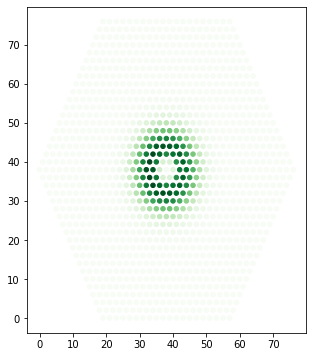

In [ ]:
f, ax  = plt.subplots(nrows = 1, ncols = 1, figsize=(5, 6))
#plot_cbar=True
#ax.scatter([0.6, .9], [0.6, 1], c = [4,9], s=20, cmap="Greens", vmin=0, vmax=9)
T = 78
Xplt = []
Yplt = []
COLORplt = []

for LOC in WORLD:
  Xplt.append(LOC.X)
  Yplt.append(LOC.Y)

  TEMP = []
  NAMESmet = []
  for key in LOC.METt:
    NAMESmet.append(key)
    TEMP.append(LOC.METt[key][T])
  
  COLORplt.append(TEMP)

COLOR = list(map(list, zip(*COLORplt)))
MAX0 = max(COLOR[0])




In [ ]:
# ANALISIS OF RESULTS
"""
def summaryr():
  #print("##########   STRAINS IN THE COMUNITY   ###########")
  #for i in COMUNIDAD:
    #print(i.ID)

  print("\n\n###########   INDIVIDUALS IN THE COMUNITY  ##########")
  INDIVIDUALS = []
  for i in COMUNIDAD:
    if i.CTYPE not in INDIVIDUALS:
      print(i.CTYPE)
      INDIVIDUALS.append(i.CTYPE)

    

  print("\n\###########   RESOURCES OVER THE TIME   ############")
  print(RES)


  print("\n\n###########   POPULATION OVER THE TIME   ############")
  for key in POPU:
    print(POPU[key], "\n")

summaryr()
"""

In [ ]:
fig, axs = plt.subplots(LAYERS, (LAYERS-1)*6, sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(30,10))
axs[0,0].plot(WORLD[0].POPt["Kiunnin"], lw=2)
axs[0,0].plot(WORLD[0].POPt["Vibrio"], lw=2)
n = 1
for i in range(1,8):
  for j in range(6*i):
    axs[i,j].plot(WORLD[n].POPt["Kiunnin"], lw=2)
    axs[i,j].plot(WORLD[n].POPt["Vibrio"], lw=2)
    n+=1
    

<h1> PROTO CONCLUSIONES <h1> TRUE


*   The R values over the time show a point t where the resources R starts to decline. In a near point t' the resources R reaches the lowest values. This could be by the dinamics of the uptake function; the more resources there are, highest is the Ur and therefore the R decay. Aparently only with changes of the order of powers of 10 the point P is significantly translated.
*   The point P is aproximately the time when a kind of steady state of the population is reached. Maybe this fenomenom occurs because of the R decay. Resources decay + popoulation growth increases the R decay. 
* Does not gives confidence the abrupt change of dynamics in the population and R values. A sigmoidal function is expected, but maybe, in this part is not the case. 
* The different length of the peaks are by the slitly different I.C. of the daugther cells





<h1> QUESTIONS <h1>

* It could be proactive to create a class of comunity?
* Are the dictionaries of dictionaries a bad administration?
* It is better to have a dictionary of the strains in our world?
* Comprehension lists?
* Is always the same order to access a dictionary? O.o
* Turn str into a variable

In [ ]:
this_loc = [1,3,5,7,9]
ys=list(map(list, zip(*this_loc)))


In [ ]:
B = [1,2,3,4]
A = random.shuffle(B)
B11

In [ ]:
#### TESTS
X = "Id"
A = {
    "q": ["0.0001", 1],
    "Vmax": 0.01,
    "Km": 1,
}
A["q"].append(2)
A["q"].append(2)
A["NEW"] = [1,2,3]
A[X] = "NAJ"
A[X] = "bab"
A.get("m") is None  
A.get(X) is None
A

In [ ]:
KEYS = ["S1", "S2",]
VAL = [0, 3]
DFK = dict.fromkeys(KEYS, VAL)

A = DFK["S1"][0:len(DFK["S1"])]
print(A)
A.append(2)
DFK["S1"] = A

#DFK["S1"].append(2)
DFK


In [ ]:
ALEX = {"S1": {}, "S2": {}}
ALEX["S1"]["QQ"] = [1]

#addDL(ALEX["S1"], "QQ", 3)
ALEX
ALEX["NUEVO"] = 666
ALEX["NUEVO"] = 666+111
ALEX
for i in range(0):
  print(2**i)
"A"+"W"




In [ ]:
from scipy import stats
p = 0.5
FUN = stats.bernoulli.rvs(10, p)

In [ ]:
4%2

Por si han pensado no vacunarse o antes de que empiecen a escuchar teorías conspiradoras que los confundan, es interesante lean esto.
Está bien documentado y  todo es correcto.
Para aquellos que no tuvieron la oportunidad de ver las 4 horas de discusión de la FDA sobre el status del virus/vacunaciones (22 oct) y las 4 horas de la discusión de la FDA sobre la vacuna de Pfizer (10 dic), esto es un interesante resumen:
- Actualmente existen 7 coronavirus en el mundo que enferman a seres humanos; solo 3 lo hacen severamente (MERS, SARS y SARS-COV-2).
Precisamente, SARS-COV-2 (el de la pandemia actual que causa COVID-19), es un primo de SARS.
Eso ayudó tremendamente en el desarrollo de las vacunas, pues ya se tenían años adelantados de análsis del SARS.
- Tras 9 meses de pandemia, los casos de re-infección de personas recuperadas de COVID-19 siguen siendo estadísticamente insignificantes, lo que plantea buenas señales para protección por enfermedad natural o vacunación. 
- Además del trabajo adelantado con SARS, lo que permitió ahorrar años para el desarrollo de la vacuna contra SARS-COV-2, explicaron que uno de los asuntos que más tiempo consume en cuanto a una vacuna nueva es desarrollar la capacidad de manufactura y producción de la vacuna. Típicamente dura 5-6 años, principalmente por razones de capital y desarrollo del mercado. En el caso actual, se ahorraron esos 5-6 años al invertir billones de dólares en esa capacidad sin esperar a saber si la vacuna funcionaba. Eso es vital, pues lo "rápido" de la vacuna no tiene que ver con saltar pasos en cuanto a la vacuna propiamente, sino invertir dinero para producirla.
Típicamente se prueba primero la vacuna y entonces comienzan los 5-6 años de desarrollo industrial. Aquí se hizo ese desarrollo en 5-6 meses, simplemente porque se invirtieron 10 billones de dólares de antemano.
- Habrá un sistema casi "real-time" para identificar efectos secundarios y medir duración de la protección. 
- Las vacunas de Moderna y Pfizer requieren DOS dosis (21 días de espera en Pfizer, 28 días para Moderna); mandarán emails y textos para recordarle a las personas cuándo les toca la #2. 
- Otra razón para la velocidad de las vacunas fue la respuesta de la gente para ser voluntaria en los trials. Típicamente se piden 3,000 placebo y 3,000 con vacuna y tarda años en reclutar. Aquí se hizo en semanas y lograron 22,000 y 22,000. Es decir, el universo de los ensayos es casi 7 veces más grande de lo normal, lo que permite mayor análisis de datos.
- 95% de todos los efectos secundarios identificados en la historia de las vacunas ocurren a las 6 semanas desde la última dosis. La vacuna de Pfizer esperó 8 semanas y contando; mantendrán monitoreando por 2 años.
- Vacuna de Pfizer usa tecnología mRNA, que no es otra cosa que una instrucción que se le da a las células para que produzcan su propia versión de las "puyitas" del coronavirus, puyitas (proteínas) que permiten al virus infectar a las células humanas. La vacuna hace que uno mismo produzca sus propias "puyitas" (sin el virus, claro está) y el sistema inmunológico reacciona a ellas como si fueran en virus de verdad. La vacuna no interactúa con el núcleo de las células ni afecta el código genético. Las vacunas mRNA tienen la ventaja adicional de que: 1. no tienen producto viral y 2. permite vacunaciones posteriores para "boostear" el sistema inmunológico.
- No se incluyó en los estudios a menores de 16, mujeres embarazadas o lactando y a inmunocomprometidos. Posiblemente no recomienden su uso, Por ahora, es para estos grupos en los que se estudia más.
- El % de personas que dicen que no se van a poner la vacuna varía por nivel de educación e ideología. Las personas ultra-derechistas y que no se graduaron de high school son el sector más resistente a ponérsela, las personas liberales y con educación universitaria son las más receptivas. Mientras más educación, más sube el % de aceptación.
-Comorbidades más vulnerables: obesidad, falla renal, diabetes. . 
- La reacción inmunológica de la vacuna puede ser hasta 4 veces más poderosa que infección natural. 
-No hubo efectos secundarios serios, excepto fiebre, dolor muscular, que solo duraba unas horas y se entiende que significa que el sistema inmunológico estaba reaccionando positivamente a la vacuna. 
- 95% eficacia; de 170 personas que se enfermaron con COVID-19, 162 eran del grupo placebo y 8 personas tenían vacuna. De esas 8, 7 fueron asintomáticas. Solo 1 fue moderada, pero no fue hospitalizado. Es decir, protegió 100% contra muerte, intubación, ingreso a ICU e incluso hospitalización; matemáticamente, hay un 97.5% de probabilidad de que, en general, la vacuna sea 90% o más en cuanto a efectividad. 
- Solamente 4 personas de 22,000 (0.02%), sufrieron de parálisis muscular facial parcial temporal (Bell's Palsy) y recuperaron sin problema. 
- En cuanto a las reacciones alérgicas, están evaluando, pero parece que se trata de reacciones alérgicas típicas a cualquier vacuna y no a esta vacuna en particular.
- La votación final a favor de la vacuna fue 17-4 (1 abstención).
Los 4 se opusieron SOLAMENTE porque entendían que debía ser de 18 en adelante y no de 16 años en adelante. En cuanto a 18+, fue unánime.